# Nvidia Multivarite Stock Forecasat with LSTM

# Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# Load the Data

In [ ]:
df = pd.read_csv("/content/NVidia_stock_history.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6437,2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0
6438,2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0
6439,2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0
6440,2024-08-27 00:00:00-04:00,125.050003,129.199997,123.879997,128.300003,301726100,0.0,0.0
6441,2024-08-28 00:00:00-04:00,128.119995,128.330002,122.639999,125.175003,241795982,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6442 non-null   object 
 1   Open          6442 non-null   float64
 2   High          6442 non-null   float64
 3   Low           6442 non-null   float64
 4   Close         6442 non-null   float64
 5   Volume        6442 non-null   int64  
 6   Dividends     6442 non-null   float64
 7   Stock Splits  6442 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 402.8+ KB


In [ ]:
# Convert 'Date' to datetime, handling timezone information if present
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Extract only the date and format it as YYYY-MM-DD
df['Date'] = df['Date'].dt.date

print(df)

            Date        Open        High         Low       Close      Volume  \
0     1999-01-22    0.040129    0.044786    0.035590    0.037621  2714688000   
1     1999-01-25    0.040607    0.042039    0.037621    0.041562   510480000   
2     1999-01-26    0.042039    0.042876    0.037740    0.038337   343200000   
3     1999-01-27    0.038457    0.039412    0.036307    0.038218   244368000   
4     1999-01-28    0.038218    0.038457    0.037859    0.038098   227520000   
...          ...         ...         ...         ...         ...         ...   
6437  2024-08-22  130.020004  130.750000  123.099998  123.739998   376189100   
6438  2024-08-23  125.860001  129.600006  125.220001  129.369995   323230300   
6439  2024-08-26  129.570007  131.259995  124.370003  126.459999   331964700   
6440  2024-08-27  125.050003  129.199997  123.879997  128.300003   301726100   
6441  2024-08-28  128.119995  128.330002  122.639999  125.175003   241795982   

      Dividends  Stock Splits  
0      

In [ ]:
# Create a date range for filtering
start_date = '2023-07-01'
end_date = '2024-08-28'

# Convert 'date' column to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(filtered_df)


           Date        Open        High         Low       Close     Volume  \
6150 2023-07-03   42.504272   42.885158   42.189368   42.400303  198209000   
6151 2023-07-05   42.122388   43.164076   42.072404   42.304337  323618000   
6152 2023-07-06   41.831479   42.166378   41.333627   42.090401  303582000   
6153 2023-07-07   42.309331   43.201066   42.167375   42.490276  355881000   
6154 2023-07-10   42.644232   42.798185   41.636531   42.167374  353908000   
...         ...         ...         ...         ...         ...        ...   
6437 2024-08-22  130.020004  130.750000  123.099998  123.739998  376189100   
6438 2024-08-23  125.860001  129.600006  125.220001  129.369995  323230300   
6439 2024-08-26  129.570007  131.259995  124.370003  126.459999  331964700   
6440 2024-08-27  125.050003  129.199997  123.879997  128.300003  301726100   
6441 2024-08-28  128.119995  128.330002  122.639999  125.175003  241795982   

      Dividends  Stock Splits  
6150        0.0           0.0  

In [ ]:
df = filtered_df.copy()

In [ ]:
# Preprocessing data (multivariate features)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'High', 'Low', 'Volume', 'Close']].values

# Preprocess the Data

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
# Define lookback window and features
timesteps = 10
num_features = scaled_data.shape[1]

In [ ]:
# Prepare training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
# Create dataset matrix for LSTM (multivariate)
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, :])  # Use all features, not just the first one
        y.append(dataset[i + look_back, -1])  # Predict 'Close' price
    return np.array(X), np.array(y)

In [ ]:
look_back = timesteps
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [ ]:
# Reshape input to [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


# LSTM Model

In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model

In [ ]:
# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - loss: 0.0912 - val_loss: 0.0625
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0142 - val_loss: 0.0166
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0089 - val_loss: 0.0385
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081 - val_loss: 0.0096
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - val_loss: 0.0203
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 0.0090
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0089
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027 - val_loss: 0.0078
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 0.0078
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - val_loss: 0.0078
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 0.0100


# Prediction

In [ ]:
# Predictions
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [ ]:
# Inverse scaling to get the original 'Close' price
# We only need the 'Close' column to be inverse scaled

# Extract the 'Close' price from the test data and predictions
scaled_close = test_data[timesteps:, -1].reshape(-1, 1)
y_test_close = np.zeros((len(scaled_close), num_features))
y_test_close[:, -1] = scaled_close.flatten()

# Inverse transform the real test data
y_test_original = scaler.inverse_transform(y_test_close)[:, -1]

# Predicting values
y_pred_close = np.zeros((len(y_pred), num_features))
y_pred_close[:, -1] = y_pred.flatten()

# Inverse transform the predicted values
y_pred_original = scaler.inverse_transform(y_pred_close)[:, -1]


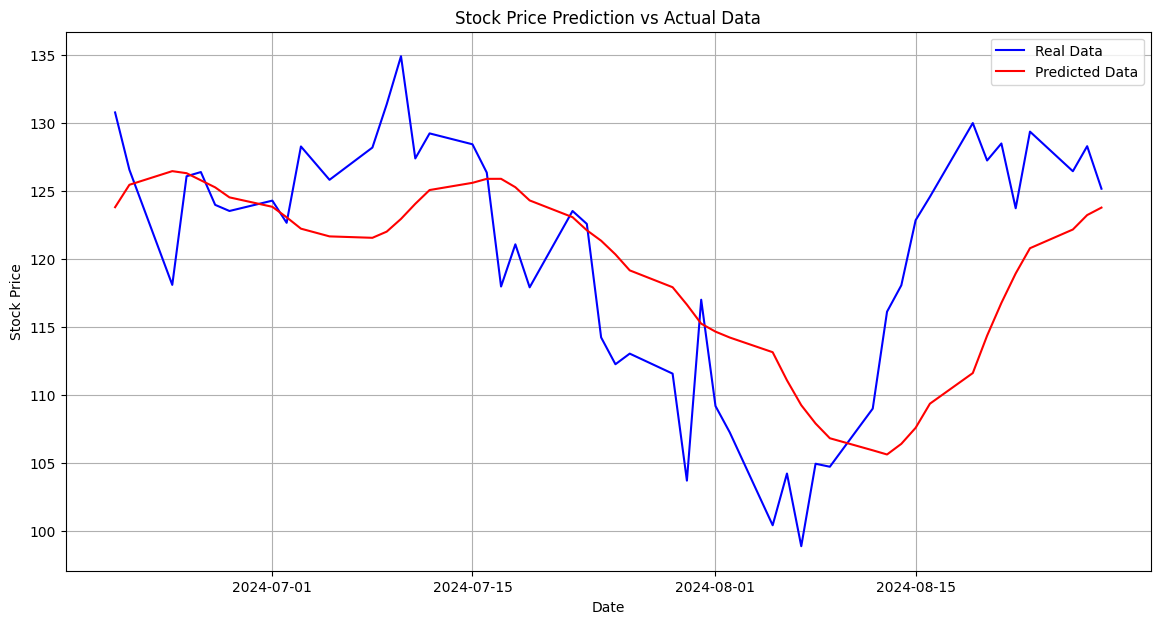

In [ ]:
# Extract the dates for plotting
dates = df.index[-len(y_test_original):]

# Plot the real test data
plt.figure(figsize=(14,7))
plt.plot(dates, y_test_original, label='Real Data', color='blue')

# Plot the predicted data
plt.plot(dates, y_pred_original, label='Predicted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()



# Next 30 Days Forecast

In [ ]:
# Number of days to forecast
forecast_days = 30

# Prepare input data for forecasting
last_known_data = test_data[-look_back:]  # Last known data from the test set

# Prepare arrays to store forecast results
forecast_data = np.zeros((forecast_days, num_features))

# Perform forecasting
for i in range(forecast_days):
    # Predict next step
    next_step = model.predict(last_known_data.reshape(1, look_back, num_features))

    # Save the prediction
    forecast_data[i, -1] = next_step.flatten()

    # Update the input data for the next step
    last_known_data = np.roll(last_known_data, -1, axis=0)
    last_known_data[-1, -1] = next_step.flatten()

# Inverse transform the forecast data
forecast_data_original = scaler.inverse_transform(forecast_data)[:, -1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<ipython-input-24-8373385fc4d5>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecast_data[i, -1] = next_step.flatten()
<ipython-input-24-8373385fc4d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_known_data[-1, -1] = next_step.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


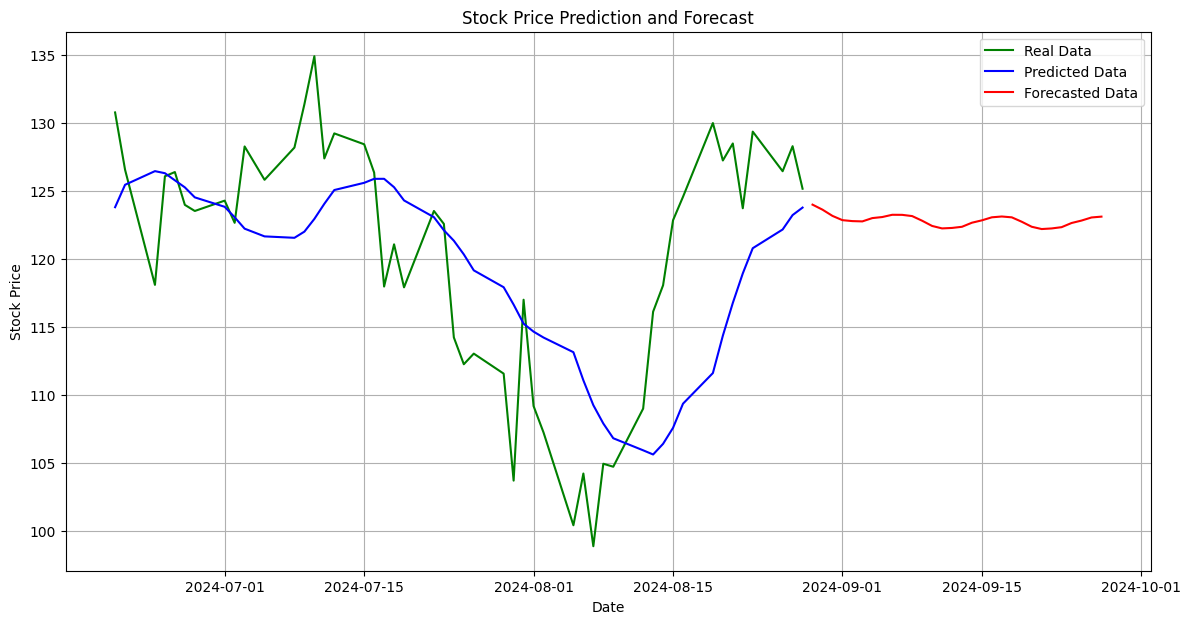

In [ ]:
# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Plot the real test data
plt.figure(figsize=(14,7))
plt.plot(dates, y_test_original, label='Real Data', color='green')

# Plot the predicted data
plt.plot(dates, y_pred_original, label='Predicted Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


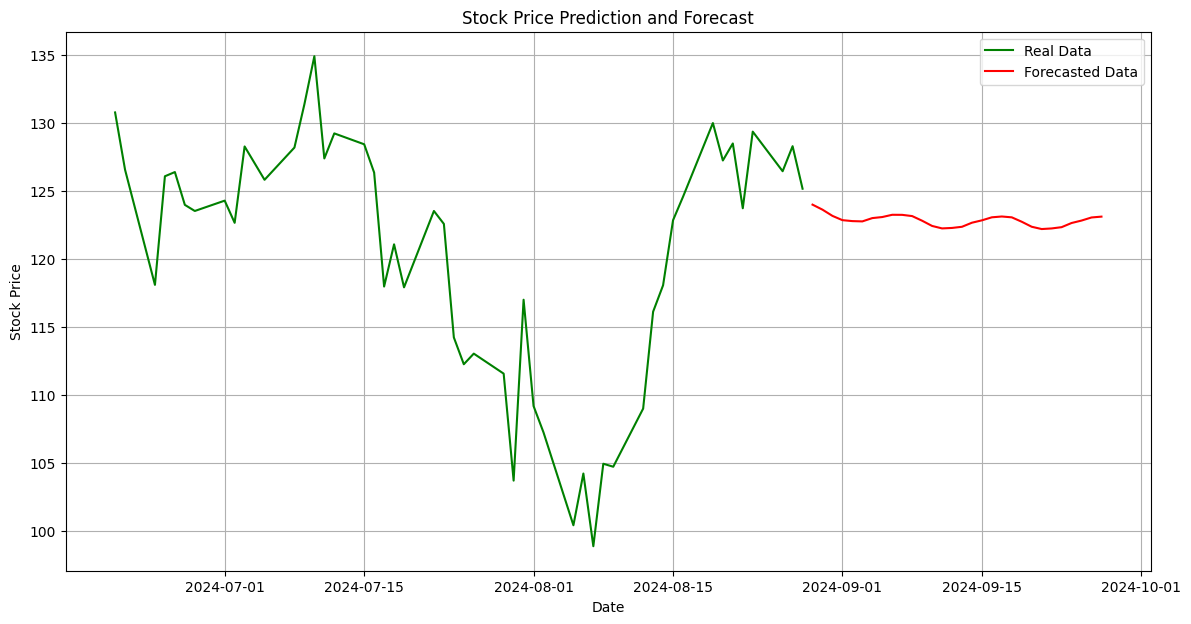

In [ ]:
# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Plot
plt.figure(figsize=(14,7))


# Plot the actual data
plt.plot(dates, y_test_original, label='Real Data', color='green')

# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


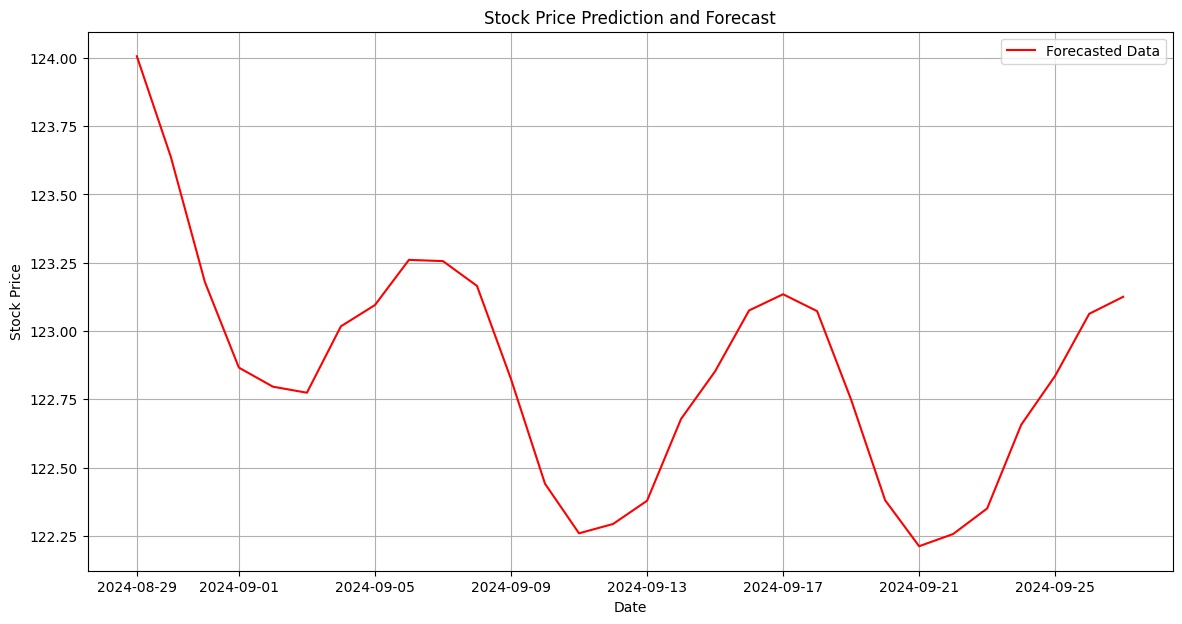

In [ ]:
# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Plot the
plt.figure(figsize=(14,7))


# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


# Next 90 Days Forecast

In [ ]:
# Number of days to forecast
forecast_days = 90

# Prepare input data for forecasting
last_known_data = test_data[-look_back:]  # Last known data from the test set

# Prepare arrays to store forecast results
forecast_data = np.zeros((forecast_days, num_features))

# Perform forecasting
for i in range(forecast_days):
    # Predict next step
    next_step = model.predict(last_known_data.reshape(1, look_back, num_features))

    # Save the prediction
    forecast_data[i, -1] = next_step.flatten()

    # Update the input data for the next step
    last_known_data = np.roll(last_known_data, -1, axis=0)
    last_known_data[-1, -1] = next_step.flatten()

# Inverse transform the forecast data
forecast_data_original = scaler.inverse_transform(forecast_data)[:, -1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<ipython-input-28-d52c3b6182da>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecast_data[i, -1] = next_step.flatten()
<ipython-input-28-d52c3b6182da>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_known_data[-1, -1] = next_step.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

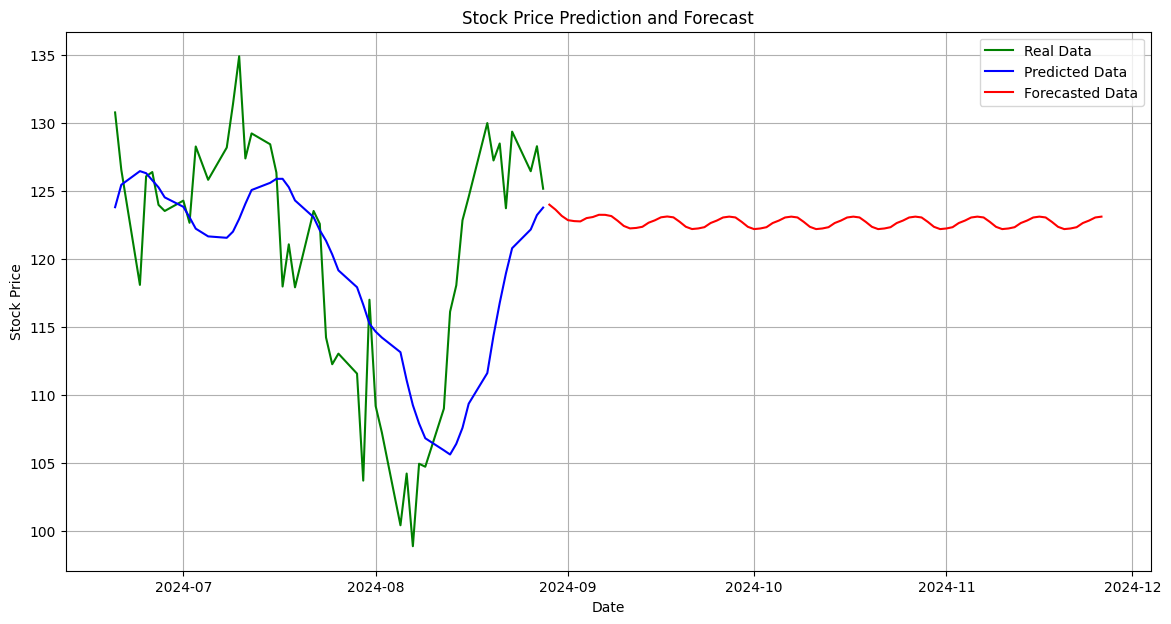

In [ ]:
# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Plot the real test data
plt.figure(figsize=(14,7))
plt.plot(dates, y_test_original, label='Real Data', color='green')

# Plot the predicted data
plt.plot(dates, y_pred_original, label='Predicted Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


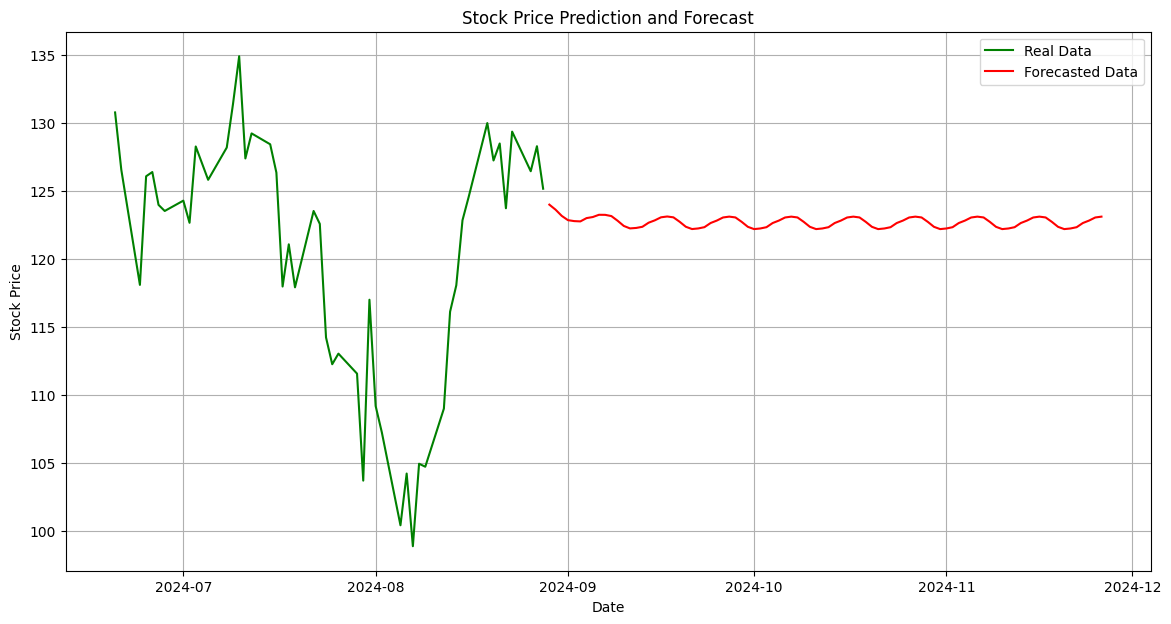

In [ ]:
plt.figure(figsize=(14,7))

# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Plot the actual data
plt.plot(dates, y_test_original, label='Real Data', color='green')

# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


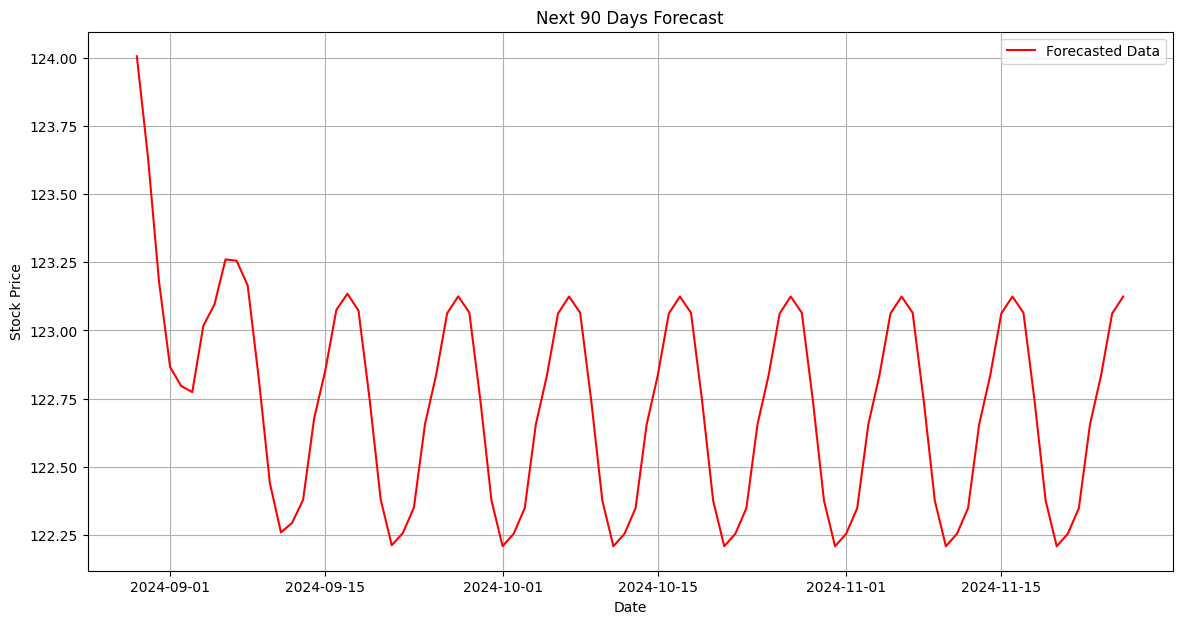

In [ ]:
plt.figure(figsize=(14,7))

# Extract the dates for plotting
dates = df.index[-len(y_test_original):]
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=forecast_days)


# Plot the forecasted data
plt.plot(forecast_dates, forecast_data_original, label='Forecasted Data', color='red')

# Add titles and labels
plt.title('Next 90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()
